In [96]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Importing train and test Dataset
train = pd.read_csv("thermoracleTrain.csv")
test = pd.read_csv("thermoracleTest.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Atmospheric Density            57016 non-null  float64
 1   Surface Temperature            56968 non-null  float64
 2   Gravity                        57016 non-null  float64
 3   Water Content                  56923 non-null  float64
 4   Mineral Abundance              57079 non-null  float64
 5   Orbital Period                 57003 non-null  float64
 6   Proximity to Star              57055 non-null  float64
 7   Magnetic Field Strength        56942 non-null  object 
 8   Radiation Levels               56979 non-null  object 
 9   Atmospheric Composition Index  57058 non-null  float64
 10  Prediction                     56961 non-null  float64
dtypes: float64(9), object(2)
memory usage: 5.0+ MB


In [4]:
# Displaying the head of the Dataset
train.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,Category_6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,Category_9,Category_9,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,Category_8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,Category_11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0


In [6]:
train.describe()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Prediction
count,57016.000000,56968.000000,57016.000000,56923.000000,57079.000000,57003.000000,57055.000000,57058.000000,56961.000000
mean,-0.000202,-0.000288,-0.000469,0.001938,-0.000730,-0.001043,0.000188,0.000211,4.454381
std,2.263527,1.936598,1.804605,1.689267,1.605524,1.511685,1.316682,1.120303,2.890055
min,-4.364843,-5.503527,-5.553877,-5.816755,-5.077363,-4.801046,-4.537187,-4.007504,0.000000
25%,-1.555810,-1.426786,-1.279002,-1.218870,-1.078449,-1.048920,-0.937097,-0.709852,2.000000
50%,-0.188670,-0.330037,0.046231,-0.004676,0.040008,0.036651,-0.062001,0.049292,4.000000
75%,1.308113,1.503646,1.255432,1.063391,1.095483,1.058800,0.888149,0.789511,7.000000
max,9.324018,5.638094,6.030290,6.287045,5.584059,5.111014,4.942699,3.852567,9.000000


In [7]:
# To know number of Null values in each Columns and we infer that there are lot of null values we need to 
# handle before giving it to the model
train.isnull().sum()

Atmospheric Density              2984
Surface Temperature              3032
Gravity                          2984
Water Content                    3077
Mineral Abundance                2921
Orbital Period                   2997
Proximity to Star                2945
Magnetic Field Strength          3058
Radiation Levels                 3021
Atmospheric Composition Index    2942
Prediction                       3039
dtype: int64

In [8]:
print(train.columns)

Index(['Atmospheric Density', 'Surface Temperature', 'Gravity',
       'Water Content', 'Mineral Abundance', 'Orbital Period',
       'Proximity to Star', 'Magnetic Field Strength', 'Radiation Levels',
       'Atmospheric Composition Index', 'Prediction'],
      dtype='object')


In [9]:
# Making list of all features that are numerical to fill the null values with the Mediam values
numerical_columns = ['Atmospheric Density', 'Surface Temperature', 'Gravity',
       'Water Content', 'Mineral Abundance', 'Orbital Period',
       'Proximity to Star','Atmospheric Composition Index']

In [11]:
#Filling null values with the Median values
train[numerical_columns] = train[numerical_columns].apply(lambda x: x.fillna(x.median()))

In [12]:
# After filling the Null values of Numerical Columns.
train.isnull().sum()

Atmospheric Density                 0
Surface Temperature                 0
Gravity                             0
Water Content                       0
Mineral Abundance                   0
Orbital Period                      0
Proximity to Star                   0
Magnetic Field Strength          3058
Radiation Levels                 3021
Atmospheric Composition Index       0
Prediction                       3039
dtype: int64

In [15]:
categorical_columns = ['Magnetic Field Strength', 'Radiation Levels']

In [38]:
for col in categorical_columns:
    # Extract numbers from the categorical column in both train and test
    train[col] = train[col].astype(str).str.extract(r'(\d+)')  # Extract number
    test[col] = test[col].astype(str).str.extract(r'(\d+)')    # Extract number
    
    # Convert to numeric (float), keeping NaN for non-numeric cases
    train[col] = pd.to_numeric(train[col], errors='coerce')
    test[col] = pd.to_numeric(test[col], errors='coerce')


In [27]:
train.isnull().sum()

Atmospheric Density                 0
Surface Temperature                 0
Gravity                             0
Water Content                       0
Mineral Abundance                   0
Orbital Period                      0
Proximity to Star                   0
Magnetic Field Strength          3058
Radiation Levels                 3021
Atmospheric Composition Index       0
Prediction                       3039
dtype: int64

In [28]:
train[categorical_columns] = train[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

In [29]:
train.isnull().sum()

Atmospheric Density                 0
Surface Temperature                 0
Gravity                             0
Water Content                       0
Mineral Abundance                   0
Orbital Period                      0
Proximity to Star                   0
Magnetic Field Strength             0
Radiation Levels                    0
Atmospheric Composition Index       0
Prediction                       3039
dtype: int64

In [30]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)  # Adjust k as needed
train['Prediction'] = imputer.fit_transform(train[['Prediction']])
train['Prediction'] = train['Prediction'].round().astype(int)  # Round to nearest integer (0-9)


In [31]:
train.isnull().sum()

Atmospheric Density              0
Surface Temperature              0
Gravity                          0
Water Content                    0
Mineral Abundance                0
Orbital Period                   0
Proximity to Star                0
Magnetic Field Strength          0
Radiation Levels                 0
Atmospheric Composition Index    0
Prediction                       0
dtype: int64

In [39]:
train.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,-0.330037,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,9,6,0.692907,5
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,9,9,0.049292,0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,9,8,-0.677182,4
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,9,11,0.109429,1
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,6,10,0.407941,9


In [33]:
train.isnull().sum()

Atmospheric Density              0
Surface Temperature              0
Gravity                          0
Water Content                    0
Mineral Abundance                0
Orbital Period                   0
Proximity to Star                0
Magnetic Field Strength          0
Radiation Levels                 0
Atmospheric Composition Index    0
Prediction                       0
dtype: int64

In [34]:
test.isnull().sum()

Atmospheric Density              0
Surface Temperature              0
Gravity                          0
Water Content                    0
Mineral Abundance                0
Orbital Period                   0
Proximity to Star                0
Magnetic Field Strength          0
Radiation Levels                 0
Atmospheric Composition Index    0
dtype: int64

In [40]:
test.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,9,6,-0.729809
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,9,9,-0.341850
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,9,8,-0.532658
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,9,11,-0.205558
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,6,10,0.763087


In [36]:
for col in categorical_columns:
    test[col] = train[col].astype(str).str.extract(r'(\d+)')  # Extract number
    test[col] = pd.to_numeric(train[col], errors='coerce')    # Convert to number (float)

In [37]:
test.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,9.0,6.0,-0.729809
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,9.0,9.0,-0.341850
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,9.0,8.0,-0.532658
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,9.0,11.0,-0.205558
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,6.0,10.0,0.763087


In [45]:
# Assuming 'Prediction' is the target column
X = train.drop(columns=['Prediction'])  # Features
y = train['Prediction']  # Target

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## Random Forest

In [56]:
# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=42,max_depth=18,verbose=3)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on validation set
y_pred = rf_model.predict(X_val)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 500


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500

building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500
building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.7s finished


In [57]:
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Print detailed classification report
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.8368
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1122
           1       0.92      0.97      0.95      1268
           2       0.83      0.90      0.86      1117
           3       0.80      0.83      0.81      1155
           4       0.82      0.59      0.69      1683
           5       0.80      0.84      0.82      1058
           6       0.88      0.91      0.90      1125
           7       0.88      0.90      0.89      1236
           8       0.77      0.84      0.80      1100
           9       0.77      0.77      0.77      1136

    accuracy                           0.84     12000
   macro avg       0.84      0.85      0.84     12000
weighted avg       0.84      0.84      0.83     12000



In [58]:
# Predicting on test set
test_predictions = rf_model.predict(test)

# Save results if needed
test['Predicted_Planet'] = test_predictions
test.to_csv("RF_predictions.csv", index=False)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished


In [81]:
test.drop('Predicted_Planet',inplace=True,axis=1)

In [82]:
test.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,9,6,-0.729809
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,9,9,-0.341850
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,9,8,-0.532658
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,9,11,-0.205558
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,6,10,0.763087


## XGBoost

In [84]:
# Assuming 'Prediction' is the target column
X = train.drop(columns=['Prediction'])  # Features
y = train['Prediction']  # Target

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=400,    # Number of trees (increase for better accuracy)
    learning_rate=0.2,   # Step size shrinkage
    max_depth=15,         # Maximum depth of trees
    objective="multi:softmax",  # Multi-class classification
    num_class=10,        # Number of target classes (0 to 9)
    eval_metric="mlogloss",
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred = xgb_model.predict(X_val)


In [86]:
# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.8542
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1122
           1       0.93      0.97      0.95      1268
           2       0.88      0.92      0.90      1117
           3       0.82      0.85      0.83      1155
           4       0.81      0.61      0.69      1683
           5       0.83      0.86      0.85      1058
           6       0.89      0.93      0.91      1125
           7       0.89      0.92      0.90      1236
           8       0.81      0.85      0.83      1100
           9       0.78      0.80      0.79      1136

    accuracy                           0.85     12000
   macro avg       0.85      0.86      0.86     12000
weighted avg       0.85      0.85      0.85     12000



## Neural Network

from sklearn.preprocessing import MinMaxScaler

 Selecting only numerical columns (excluding target variable 'Prediction')
numerical_columns = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Prediction')  # Remove target column

 Initialize MinMaxScaler
scaler = MinMaxScaler()

 Fit on training data and transform both train and test data
train[numerical_columns] = scaler.fit_transform(train[numerical_columns])
test[numerical_columns] = scaler.transform(test[numerical_columns])  # Use same scaler



In [87]:
X = train.drop(columns=['Prediction'])  # Features
y = train['Prediction']  # Target variable

y = keras.utils.to_categorical(y, num_classes=10)  # 10 Classes (0 to 9)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
test = scaler.transform(test)  # Apply same scaling on test set

In [89]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),  # Regularization
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/Users/apsarg/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # Number of training iterations
    batch_size=32,  # Number of samples per update
    verbose=1
)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6271 - loss: 1.1474 - val_accuracy: 0.8011 - val_loss: 0.6359
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7678 - loss: 0.7349 - val_accuracy: 0.8138 - val_loss: 0.5914
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7909 - loss: 0.6779 - val_accuracy: 0.8229 - val_loss: 0.5708
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7939 - loss: 0.6587 - val_accuracy: 0.8294 - val_loss: 0.5474
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8005 - loss: 0.6321 - val_accuracy: 0.8302 - val_loss: 0.5432
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8031 - loss: 0.6292 - val_accuracy: 0.8312 - val_loss: 0.5313
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8142 - loss: 0.6042 - val_accuracy: 0.8344 - val_loss: 0.5247
Epoch 8/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8108 - loss: 

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8299 - loss: 0.5419 - val_accuracy: 0.8483 - val_loss: 0.4824
Epoch 51/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8315 - loss: 0.5473 - val_accuracy: 0.8497 - val_loss: 0.4799
Epoch 52/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8355 - loss: 0.5329 - val_accuracy: 0.8500 - val_loss: 0.4818
Epoch 53/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8298 - loss: 0.5425 - val_accuracy: 0.8494 - val_loss: 0.4811
Epoch 54/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8304 - loss: 0.5422 - val_accuracy: 0.8509 - val_loss: 0.4814
Epoch 55/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8333 - loss: 0.5402 - val_accuracy: 0.8483 - val_loss: 0.4849
Epoch 56/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8304 - loss: 0.5419 - val_accuracy: 0.8489 - val_loss: 0.4815
Epoch 57/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8329 - loss: 0.5340

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8373 - loss: 0.5260 - val_accuracy: 0.8510 - val_loss: 0.4798
Epoch 100/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8321 - loss: 0.5378 - val_accuracy: 0.8519 - val_loss: 0.4769


In [91]:
# Predict on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Validation Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_true_classes, y_pred_classes))


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Validation Accuracy: 0.8519
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1122
           1       0.93      0.97      0.95      1268
           2       0.84      0.93      0.88      1117
           3       0.81      0.86      0.84      1155
           4       0.89      0.56      0.69      1683
           5       0.84      0.87      0.86      1058
           6       0.89      0.93      0.91      1125
           7       0.89      0.91      0.90      1236
           8       0.77      0.85      0.81      1100
           9       0.77      0.84      0.80      1136

    accuracy                           0.85     12000
   macro avg       0.85      0.86      0.85     12000
weighted avg       0.85      0.85      0.85     12000



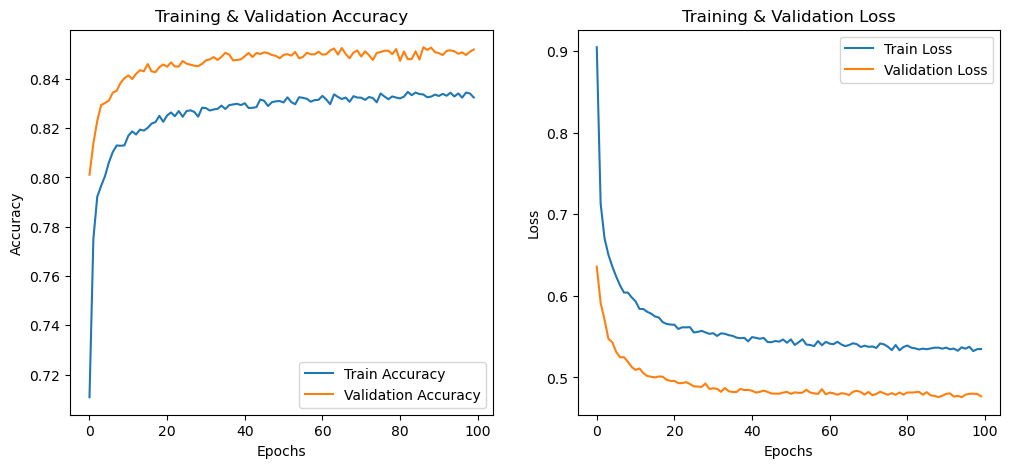

In [92]:
import matplotlib.pyplot as plt

# Plot accuracy & loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")

plt.show()


In [104]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),  # Prevent overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),  # Regularization
    Dense(32, activation='relu'),  # Hidden layer
    Dropout(0.3),  # Regularization
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compile Model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [105]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [107]:
# Train Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,  # Number of training iterations
    batch_size=32,  # Number of samples per update
    verbose=1,
     #callbacks=[early_stop]
)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8135 - loss: 0.6210 - val_accuracy: 0.8407 - val_loss: 0.5164
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8124 - loss: 0.6239 - val_accuracy: 0.8421 - val_loss: 0.5119
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8159 - loss: 0.6123 - val_accuracy: 0.8450 - val_loss: 0.5124
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8155 - loss: 0.6129 - val_accuracy: 0.8435 - val_loss: 0.5123
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8149 - loss: 0.6179 - val_accuracy: 0.8406 - val_loss: 0.5131
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8136 - loss: 0.6183 - val_accuracy: 0.8456 - val_loss: 0.5080
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8189 - loss: 0.6060 - val_accuracy: 0.8438 - val_loss: 0.5122
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8177 - loss: 0.5983 - 

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8215 - loss: 0.5951 - val_accuracy: 0.8477 - val_loss: 0.5035


In [109]:
# Predict on validation set
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Validation Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_true_classes, y_pred_classes))


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Validation Accuracy: 0.8477
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1122
           1       0.91      0.97      0.94      1268
           2       0.85      0.92      0.88      1117
           3       0.81      0.85      0.83      1155
           4       0.88      0.57      0.69      1683
           5       0.83      0.85      0.84      1058
           6       0.88      0.93      0.90      1125
           7       0.88      0.92      0.90      1236
           8       0.79      0.84      0.81      1100
           9       0.76      0.81      0.79      1136

    accuracy                           0.85     12000
   macro avg       0.85      0.86      0.85     12000
weighted avg       0.85      0.85      0.84     12000



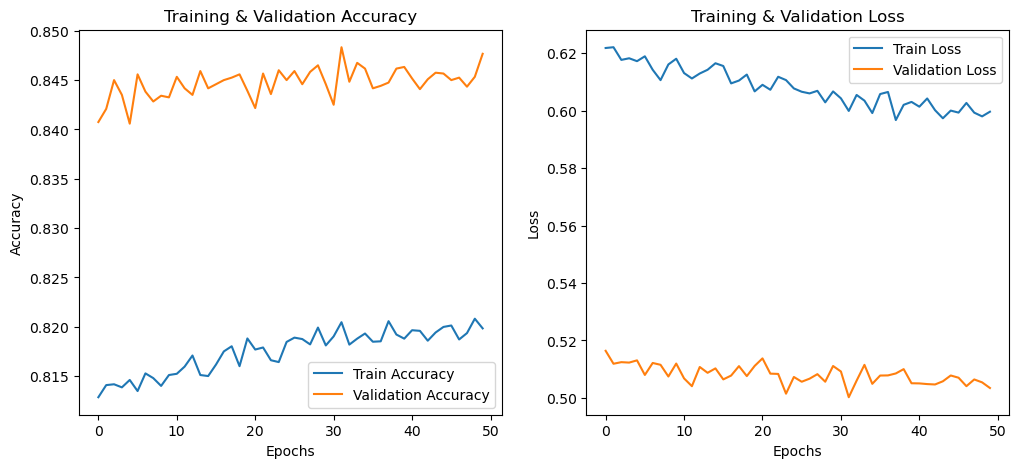

In [110]:
import matplotlib.pyplot as plt

# Plot accuracy & loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")

plt.show()